### Figure 6A
<p> The following code will generate plots of the mean difference confidence intervals for tax-4/N2, osm-9/N2 and tax-4:osm-9 double/N2. These plots represent the mean difference in response compared to the mean of the null response to DMSO:DMSO and DMSO:H2O</p>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import pandas as pd
import numpy as np
import math

#### Reading in and cleaning up the datasets
<p> When we are generating this plot we want to order the mutant data according to the N2 response. This helps us to visualize the change in response, if any.</p>

In [2]:
#Generating a function that subsets the data for a single 'control' condition
def subset_ref_comp(df, strain):
    dat = df.loc[df['Strain'] == strain]
    dat =dat.sort_values('difference')
    #Two compounds accidently made it into the mutant screen that should have been excluded due to a sorting error
    dat = dat.loc[(dat['test'] != '2-Nonylquinolin-4(1H)-one') & (dat['test'] != 'Rosmarinic acid')& (dat['test'] != 'Safranal')]
    dat = dat.reset_index(drop=True)
    return dat


In [3]:
#Reading all relevant datasets

N2dat = pd.read_csv('C:/Users/Emily/Documents/S1/toMutantScreen_mdiff.csv', index_col=0)
N2dat['Strain'] = 'N2'
all_strains = pd.read_csv('C:/Users/Emily/Documents/S1f2/all_strains_nullrefs_mdiff.csv', index_col=0)

#### We are using the sorted N2 mean differences (calculated for the 95% confidence intervals) for all testing conditions relative to DMSO. This list will be passed to the function call below.

In [4]:
N2DMSO = subset_ref_comp(N2dat, 'N2')
comp_ord= N2DMSO['test']

#### Generating vertical line plots to visualize the difference in response between N2 and mutant strains for both DMSO and water conditions

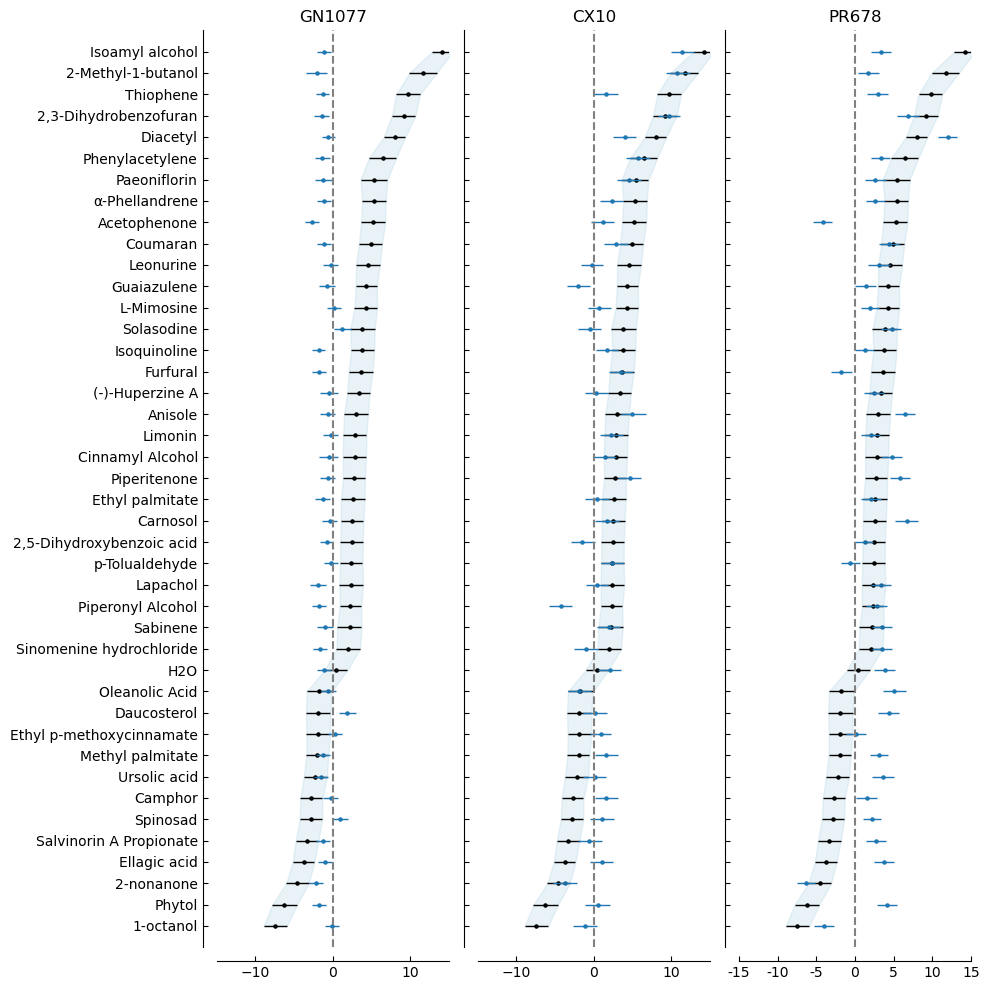

In [5]:
strains = ['GN1077', 'CX10', 'PR678']

fig, ax = plt.subplots(figsize=(10,10), ncols=len(strains), sharey=True) 

control = 'DMSO'


for i in strains:

    mutant_dat = all_strains.loc[all_strains['Strain']==i]

    c = strains.index(i)
    

    positions = list(range(0, len(comp_ord)))
    ref_dat1 = N2DMSO.loc[N2DMSO['control']==control]
    ref_dat1 = ref_dat1.set_index('test')

    reordered1 = ref_dat1.reindex(comp_ord)
    reordered1 = reordered1.reset_index()
    reordered1['bca_low'] = reordered1['bca_low'].astype(np.float64)
    reordered1['bca_high'] = reordered1['bca_high'].astype(np.float64)


    lines1 = []
    for index, row in reordered1.iterrows():
        line = ((row['bca_low'], index), (row['bca_high'], index))
        lines1.append(line)

    ref_dat2 = mutant_dat.loc[mutant_dat['control']==control]
    ref_dat2 = ref_dat2.set_index('test')

    reordered2 = ref_dat2.reindex(comp_ord)
    reordered2 = reordered2.reset_index()

    lines2 = []
    for index, row in reordered2.iterrows():
        line = ((row['bca_low'], index), (row['bca_high'], index))
        lines2.append(line)

    ax[c].fill_betweenx(positions, reordered1['bca_low'], reordered1['bca_high'], alpha=.25, color='#a6cee3')
    ytick_labels = list(reordered1['test'])

    mdiffs1 = list(reordered1['difference'])
    mdiffs2 = list(reordered2['difference'])

    #fig, ax = plt.subplots(figsize=(5,10)) 

    hln_coll1 = mpl.collections.LineCollection(lines1, colors='black', linewidths = 1)
    hln_coll2 = mpl.collections.LineCollection(lines2, colors='#1f78b4', linewidths = 1)
    #ax[r,c] = plt.gca()


    x_positions = list(np.arange(-15, 20, 5))

    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)


    #ax[r,c].xaxis.set_ticks_position('both')
    ax[c].add_collection(hln_coll1)
    ax[c].add_collection(hln_coll2)
    ax[c].scatter(mdiffs1, positions, s=5, c='black')
    ax[c].scatter(mdiffs2, positions, s=5, c='#1f78b4')
    ax[c].tick_params(axis='both', tickdir='in')
    ax[c].spines['top'].set_visible(False)
    ax[c].spines['right'].set_visible(False)

    ax[c].set_xlim(-15, 15)    
    ax[c].set_ylim(-1, len(comp_ord))
    ax[c].set_title(i)
    ax[c].axvline(0, ls='--', c='gray')
    sns.despine(offset=10)
    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/allmuts_mdiffPlot_DMSOnly.svg')


#### The following code generates the heatmaps that are overlayed onto the confidence interval plots above in 6A

In [6]:
#Generating a function that subsets the data for each strain
def subset_ref_comp(df, strain):
    dat = df.loc[(df['Strain'] == strain)&(df['control'] == 'DMSO')]
    dat =dat.sort_values('difference')
    #Two compounds accidently made it into the mutant screen that should have been excluded due to a sorting error
    dat = dat.loc[(dat['test'] != '2-Nonylquinolin-4(1H)-one') & (dat['test'] != 'Rosmarinic acid')& (dat['test'] != 'Safranal')]
    dat = dat.reset_index(drop=True)
    return dat


In [7]:
#Delta-delta values were calculated in the Mutant follow up analysis code. We used this value for the heatmap overlay
data = pd.read_csv('/Users/Emily/Desktop/ReviewerResponses/dd_allLines.csv', index_col=0)

data['test'] = pd.Categorical(data['test'], ordered=True, categories=comp_ord)
reordered = data.sort_values('test', ascending=False)
srtd = reordered.set_index('test')

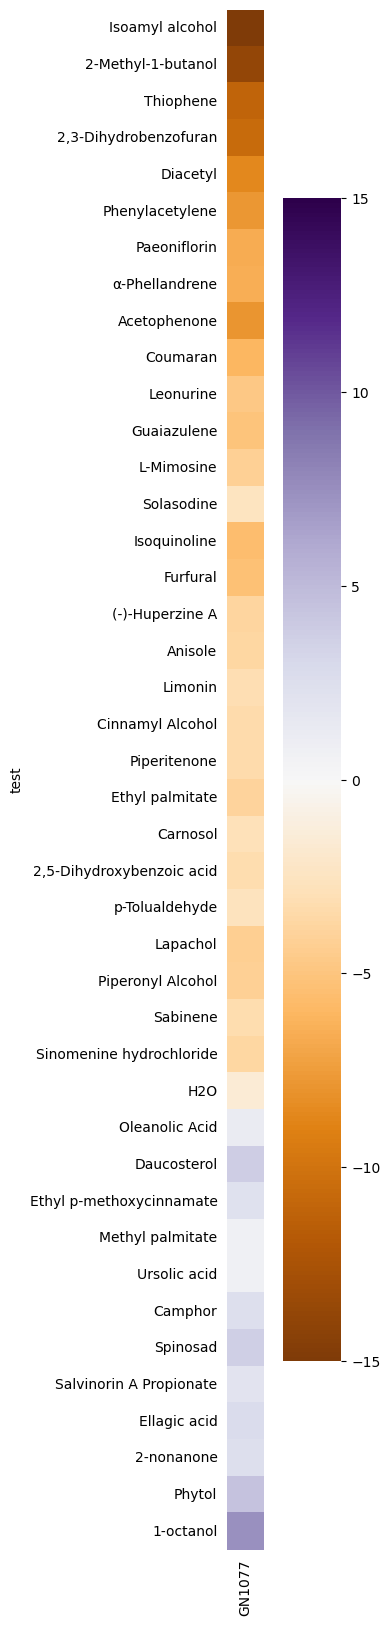

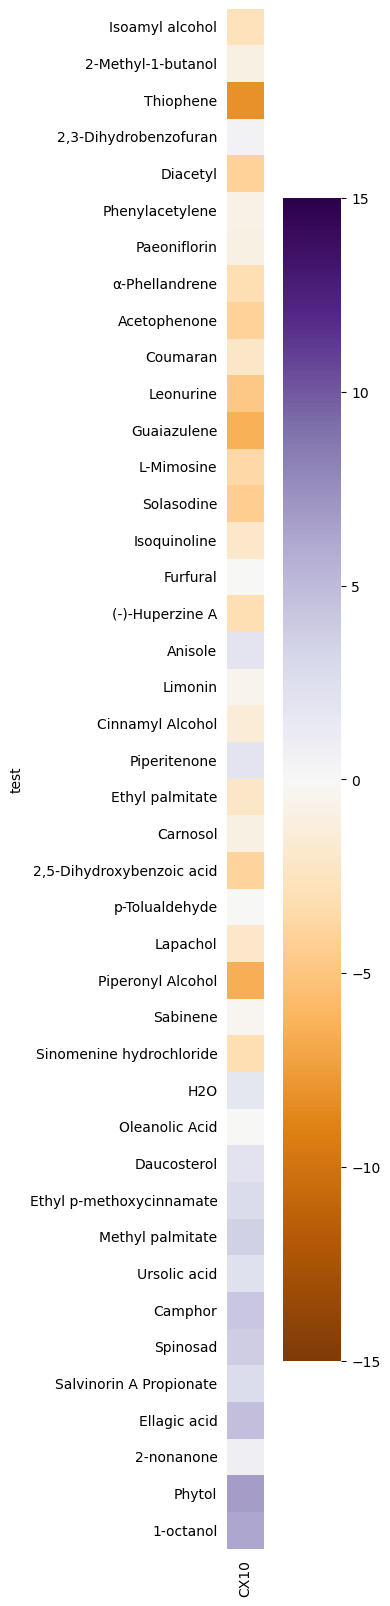

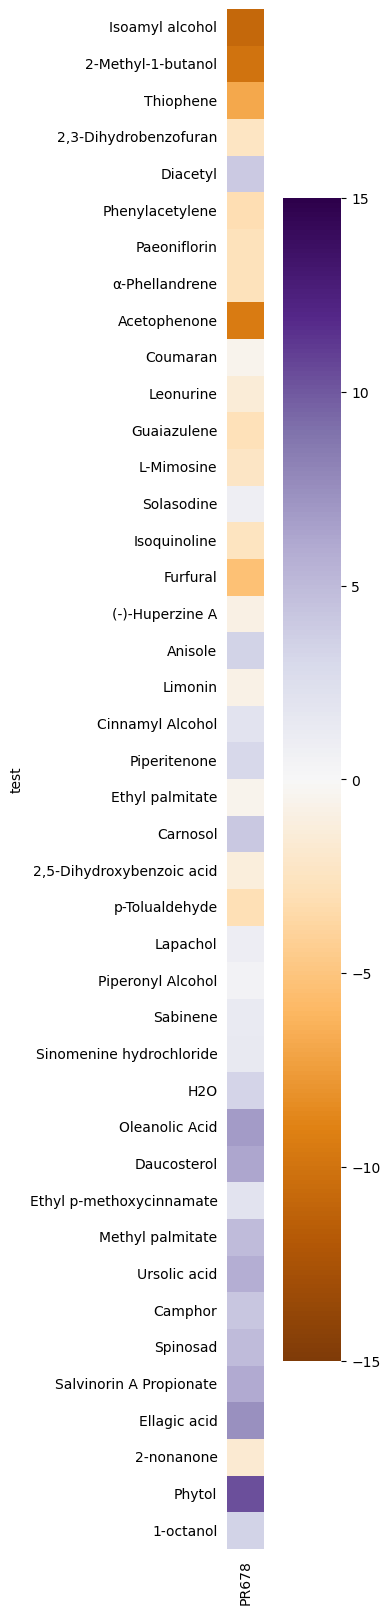

In [8]:
#Plotting the delta-delta values for each strain vs each test condition

strains = ['GN1077', 'CX10', 'PR678']

for s in strains:
    df = pd.DataFrame(srtd[s])
    fig, ax = plt.subplots(figsize=(5,20))
    sns.heatmap(df,  vmax=15, vmin=-15, center=0, cmap='PuOr', square=True)
    ax.tick_params(bottom=False, left=False)
    plt.xticks(rotation=90)
    #plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('/Users/Emily/Desktop/ReviewerResponses/hmap_'+s+'.svg')
    plt.show()

### Fig 6B - 3D scattermap

In [14]:
#Creating classifications for N2 response to test compounds. This will be used to color the scatterplot to indicate the
#original WT response

highcomps = N2dat.loc[N2dat['bca_low']>0]['test']
lowcomps = N2dat.loc[N2dat['bca_high']<0]['test']

In [15]:
srtda = srtd.reset_index()
srtda.head()

,test,GN1077,PR678,CX10
0,Isoamyl alcohol,-15.318320,-10.806082,-2.779660
1,2-Methyl-1-butanol,-13.802287,-9.989616,-0.928199
2,Thiophene,-11.082088,-6.835087,-8.194683
3,"2,3-Dihydrobenzofuran",-10.619060,-2.403412,0.541383
4,Diacetyl,-8.572018,4.004894,-4.020943


In [16]:
#Adding the N2 classification to the plotting dataframe
def add_v(r):
    if r['test'] in list(highcomps):
        val = 'H'
    elif r['test'] in list(lowcomps):
        val = 'L'
    else:
        val = 'oops'
    return val
    
srtda['N2_response'] = srtda.apply(add_v, axis=1)

In [21]:
#Checking to see if any test compounds are missing from the analysis. Water is expected to be left of the list because there
# is supposed to be little to no response in WT animals.
srtda.loc[srtda['N2_response']=='oops']

,test,GN1077,PR678,CX10,N2_response,area
29,H2O,-1.585629,3.397281,1.652838,oops,3.949327


In [17]:
#Using the loss of response in GN1077 (double knockout) to determine the point size in our scatter plot.
#larger points means that the strength of the WT response was large
srtda['area'] = srtda['GN1077'].apply(lambda x: abs((math.pi*(x**2))/2))
srtda.head()

,test,GN1077,PR678,CX10,N2_response,area
0,Isoamyl alcohol,-15.318320,-10.806082,-2.779660,H,368.588798
1,2-Methyl-1-butanol,-13.802287,-9.989616,-0.928199,H,299.241610
2,Thiophene,-11.082088,-6.835087,-8.194683,H,192.913699
3,"2,3-Dihydrobenzofuran",-10.619060,-2.403412,0.541383,H,177.129963
4,Diacetyl,-8.572018,4.004894,-4.020943,H,115.421316


In [22]:
srtdb = srtda.sort_values(by='GN1077').reset_index(drop=True)

h = srtdb.loc[srtdb['N2_response']=='H']
l = srtdb.loc[srtdb['N2_response']=='L']

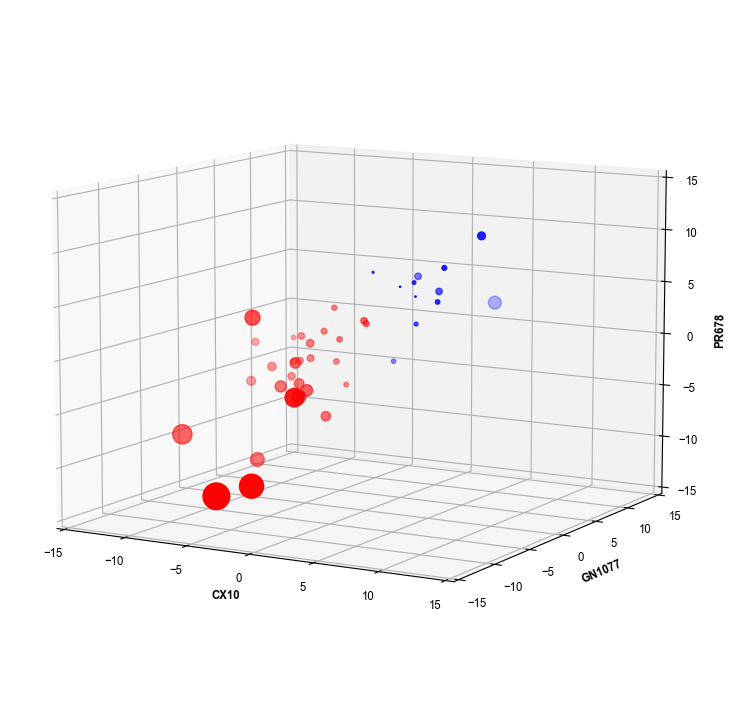

In [23]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
 
# Creating plot

ax.scatter(h['CX10'], h['GN1077'], h['PR678'],  c='red', s=h['area'], )#depthshade=False)
ax.scatter(l['CX10'], l['GN1077'], l['PR678'],   c='blue', s=l['area'], )#depthshade=False)
#ax.scatter(0,0,0,c='black')
#ax.stem(h['CX10vN2'], h['GN1077vN2'], h['PR678vN2'])

#for index, row in diff.iterrows():
#    ax.text(row['CX10vN2']-2, row['GN1077vN2'], row['PR678vN2'], index)

ax.set_zlabel('PR678', fontweight ='bold') 
ax.set_ylabel('GN1077', fontweight ='bold') 
ax.set_xlabel('CX10', fontweight ='bold')

ax.axes.set_xlim3d(left=-15, right=15) 
ax.axes.set_ylim3d(bottom=-15, top=15) 
ax.axes.set_zlim3d(bottom=-15, top=15) 
ax.view_init(elev=10., azim=-60)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.stretch'] = 'condensed'
# show plot
#fig.savefig('/Users/Emily/Desktop/ReviewerResponses/NP3D_swarm.svg')
plt.show()